## Elektrifiseringen av sokkelen - Prosjektoppgave

#### Gustav Gabrielsen

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
from pyjstat import pyjstat
import seaborn as sns

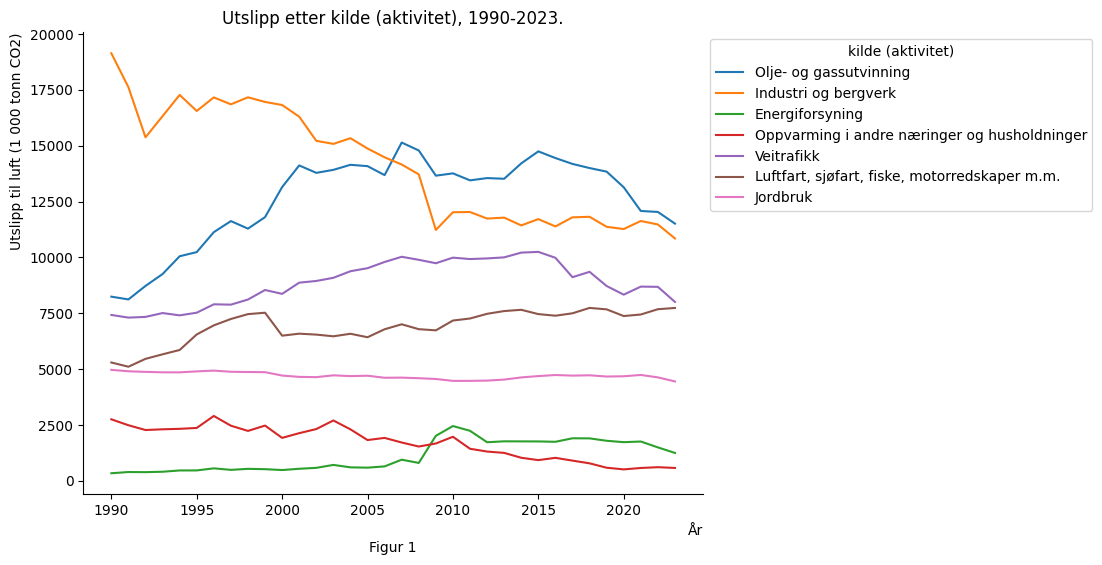

In [12]:
postUrl = 'https://data.ssb.no/api/v0/no/table/13931/'

apiQuery = {
  "query": [
    {
      "code": "UtslpTilLuft",
      "selection": {
        "filter": "vs:UtslpKildeA01",
        "values": [
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7"
        ]
      }
    },
    {
      "code": "UtslpEnergivare",
      "selection": {
        "filter": "item",
        "values": [
          "VT0"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "UtslippCO2ekvival"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

utslipp_df, df_id, ds = apiToDataframe(postUrl, apiQuery)

utslipp_df['år'] = pd.to_numeric(utslipp_df['år'])

fig ,ax = plt.subplots(figsize=(8, 6))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_ylabel('Utslipp til luft (1 000 tonn CO2)', loc='top')
ax.set_xlabel('År', loc='right')

ax.set_title('Utslipp etter kilde (aktivitet), 1990-2023.')
ax.text(0.5, -0.125, 'Figur 1', transform=ax.transAxes, ha='center')


sns.lineplot(data=utslipp_df, x="år", y="value", hue="kilde (aktivitet)")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Figur 1 viser utslipp til luft etter kilde (1 000 tonn CO2-ekvivalenter), i en tidsserie fra 1990 til 2023. Figuren viser at utslippene fra olje- og gassutvinning er størst, med ca 11 514 tonn CO2 i 2023. Observere også en negativ trend siden 2015. Denne reduksjonen i utslipp fra den norske sokkelen siden 2015 er betydelig knyttet til elektrifisering av offshore plattformer. Flere prosjekter har blitt implementert for å overføre olje- og gassplattformer fra å bruke gass-turbiner, som har høye CO2-utslipp, til å bli drevet av elektrisitet levert via kabler fra land. Denne overgangen er en del av en bredere innsats for å redusere $CO2-utslipp$ og oppnå Norges ambisiøse klimamål. 

Elektrifisering er spesielt bemerkelsesverdig ettersom den ikke bare reduserer utslipp av drivhusgasser, men også i mange tilfeller senker driftskostnadene og forbedrer den økonomiske levetiden til oljefeltene. For eksempel har betydelige prosjekter som de på Draugen og Njord A-plattformene som mål å redusere CO2-utslippene med store marginer årlig når de er fullt operasjonelle ​(S&P Global)​(Offshore Energy).

### Output market -  virkninger i utslipps kjeden 

Utslippene fra offshore platformene påvirkes først og fremst ved at gassturbiner blir erstattet med kraft fra land. Gass som blir frigjort kan eksporteres til europa, eller transporteres til land og brukes i Norge. Transport av gass igjennom rørledningene vil kreve energi, dette medfører CO2-utslipp. I hovednettet på land og ved en overføring via sjøkabel vil det dermed oppstå et et nytt behov for energi som må dekkes med å øke produksjonen av kraft på land og/eller i Europa, ved enten å økt import eller redusere eksport. Dette vil påvirke utslippene, og er avhengig av hvilken energikilde som brukes. Gassen som blir eksportert og eller brukes til ny produksjon nasjonalt vil derfor kunne føre til en økning i CO2-utslipp, men kan erstatte annen produksjon som medfører enda større CO2-utslipp (Torvanger & Ericson, 2013, s. 9). Det er netto CO2-utslipp endringen som den frigjorte gassen medfører, som er det sentrale her.

Gassen som eksporteres til Europa kan brukes til ulike formål. I dagens fordeling av gassforbruket i Europa antas det at 1/3 av gassen går til gassproduksjon. Mens resten av gassen brukes til energi, varme i industrien, bygninger og husholdninger og varmeformål, og påvirker dermed utslippene disse sektorene (Tennbakk et al, 2023, s. 10).  

Endringer i kraftstrømmene påvirker markedene. Dersom gasstilbudet øker, påvirker det prisene og fører til nye tilpasninger av tilbud og etterspørsel. Prisdannelsen i markedet er basert på en felles algoritme som innebærer at endringer i en del av markedet kan påvirke alle de andre delen i markedet. Derfor gir det ikke mening å analysere effektene av elektrifiseringen av norsk sokkel kun fra et nasjonalt persepektiv.  

Markedet for strøm i Europa er styrt av flere faktorer. Dersom man gjennomfører en elektrifiseringen av sokkelen vil markedet først justere opp sine forventninger om høyere fremtidig etterspørsel etter kraft. Forventninger om økt kraftforbruk vil kunne føre til økt kraftproduksjon igjennom økte investeringer i eksisterende produksjon og utbygging av ny produksjonskapasitet. 

#### Økt gasstilbud og utslipp 

Hvordan økt tilbud av gass påvirker netto CO2-utslipp er avhengig av hvilke alternative energikilder gassen fortrenger på marginen. Økt gass forbruk øker isolert sett utslippene, men netto effekten kommer ann på hva som er alternativ energikilde (Tennbakk et al, 2023, s. 16). 

#### Karbonlekkasje 

Økninger i kvotepriser påvirker konkurranse evnen til EU med resten av verden, økt pris kan gi opphav ti karbonlekkasje. Dette oppstår ved at varer som er produsert i Europa utkonkurreres av varer produsert utenfor Europa. Lekkasjen skjer ved enten ved at produksjonen flytter ut av europa, eller ved at forbruket vris mot importvarer som blir relativt billigere på grunn, av strengere reguleringer av klima gassutslipp i Europa. I verste fall fører karbonlekkasje til økte globale utslipp (Tennbakk et al, 2023, s. 19)

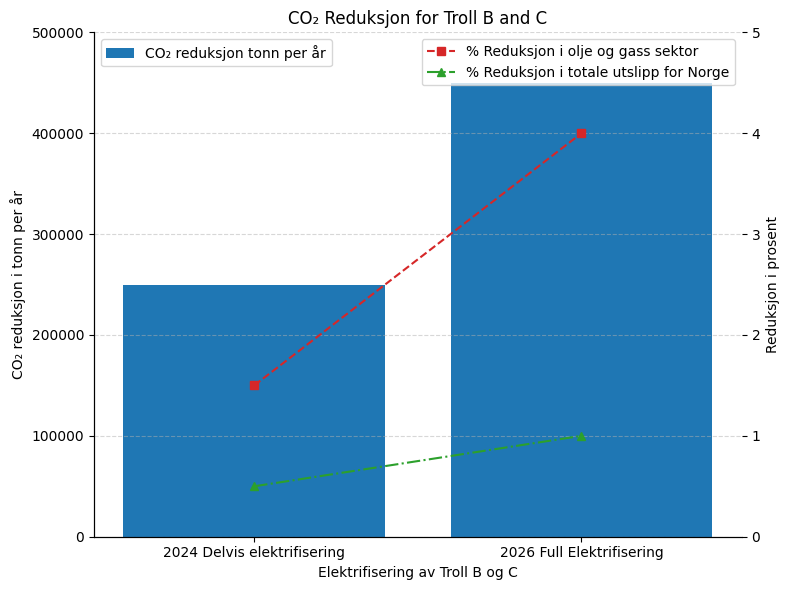

In [11]:
Prosjekt = ["2024 Delvis elektrifisering", "2026 Full Elektrifisering"]
Co2_reduksjon = [250000, 450000] 
prosent_reduksjon_oljeoggass_sektor = [1.5, 4]  
prosent_totale_utslipp = [0.5, 1]  

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.set_xlabel('Elektrifisering av Troll B og C')
ax1.set_ylabel('CO₂ reduksjon i tonn per år')
ax1.bar(Prosjekt,Co2_reduksjon, label="CO₂ reduksjon tonn per år")
ax1.tick_params(axis='y')
ax1.set_ylim(0, 500_000)
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.set_ylabel('Reduksjon i prosent')
ax2.plot(Prosjekt, prosent_reduksjon_oljeoggass_sektor, marker='s',color='tab:red', linestyle='--', label="% Reduksjon i olje og gass sektor")
ax2.plot(Prosjekt, prosent_totale_utslipp, marker='^', color='tab:green', linestyle='-.', label="% Reduksjon i totale utslipp for Norge")
ax2.tick_params(axis='y')
ax2.set_ylim(0, 5)
ax2.legend(loc="upper right")

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.title("CO₂ Reduksjon for Troll B and C")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Elektrifisering av plattformene Troll B og C - Lønnsomhetsvurdering 

I denne analysen vil jeg se nærmere på lønnsomheten ved elektrifiseringen av Troll B og Troll C. Per nå er Troll B delvis elektrifisert, mens Troll C er planlagt en full elektrifisering innen 2026.

I 2021 ble de årlige utslippsreduksjonene anslått til å utgjøre ca. 450 000 tonn $CO_2$ per år, tilsvarende over tre prosent av de totale utslippene fra olje- og gassutvinning (Equinor, 2021). Prosjektet innebærer en delvis elektrifisering av Troll B og full elektrifisering av Troll C. Den 7. september 2024 kunngjorde Equinor at plattformene B og C nå delvis drives av strøm fra land. Dette reduserer utslippene på norsk sokkel med 250 000 tonn $CO_2$, som reduserer Norge sine totale årlige utslipp med omtrent en halv prosent.

TWEL-prosjektet har som mål å fortsette elektrifiseringen, slik at Troll C blir fullt elektrifisert. Ved ferdigstillelse av full elektrifisering av Troll C skal de årlige utslippene reduseres med ytterligere 200 000 tonn $CO_2$. Den totale årlige reduksjonen i $CO_2$-utslipp er dermed beregnet til å være omtrent 450 000 tonn $CO_2$, som samsvarer med estimatet fra 2021. Totalt vil dette redusere Norges årlige utslipp med rundt én prosent og utslippene fra olje- og gassutvinning med nesten fire prosent. Infrastruktur på Kollsnes og kabelen til plattformen er designet for en eventuell full elektrifisering av Troll B på et senere tidspunkt (Equinor, 2024). 

De viktigste antakelsene og avgrensningene kan kort oppsumeres med følgende punkter:

- $CO_2$ utslipp og investeringskostander på Troll B og C: Her er det blitt anvendt tall oppgitt av Equinor (2024). 
- For å finne mengde frigjort gass er reduksjonen i $CO2-utslipp$ regnet tilbake til mengde naturgass ved å bruke gjennomsnittlige utslippsfaktorer. 
- Strømpriser er beregnet ved en lineær prognose basert på statnett sin langsiktige markedsanalyse 2022-2050 (2023). 
- Gasspris prognosen er hentet fra IEAs World Energy Outlook rapport (2024), som er en generell prisprognose. Her er det også anvendt en lineær prognose. 
- Oppgaven har sett bort i fra $CO-2$ utslipp fra stålproduksjon, dette forekommer før prosjektet er oppe å kjører, og kommer av legging av strømkabel. 

#### Kostnader for elektrifisering av Troll B og C

Equinor har beregnet at investeringene knyttet til elektrifiseringen av Troll B og C vil beløpe seg til om lag 8.1 milliarder nok. Prosjektet har fått tilegnet støtte ifra næringslivets NOx-fond på totalt 520 millioner norske kroner. 

Investeringskostnaden er den største komponenten og er særlig avgjørende for prosjektets lønnsomhet. Dette er fordi strøm- og gasspris ofte er positivt korrelerte. Det vil si at når gassprisene øker, har strømprisene en tendens til øke. Derfor kan inntektene som kommer fra den frigjorte gassen som et resultat av elektrifiseringen, delvis motvirkes av høye strømpriserm, slik at netto effekten blir lavere. 

#### Driftskostander - strøm og vedlikehold

For å finne de årlige drifts kostnadene på plattformene er man avhengig av strømpriser og vedlikeholdskostnader. 

Det totale strømforbruket er estimert til 116MW etter full elektrifisering av Troll C (Equinor, 2024), det totale strømforbruket inkluderer et overføringstap på ca. 9%. Strømmen transporteres fra en kabel i Kollsnes til Troll B, og deretter fra troll B til troll C. Begge plattformene har vært drevet med gass turbiner tidligere (Tjåland, 2022, s.52). Strømbehovet har derfor vært dekket av gass turbiner, men for å reduserer karbonavtrykket, er det besemt at troll B delvis skal elektrifiseres, mens Troll C skal elektrifiseres fullstendig. Troll B skal bare delvis elektrifiseres på grunn av at plattformen skal kunne fungere som en sikkerhetsventil i tilfelle strømbrudd. 

Strømprisen fra det norske kraftverket er i vurdering beregnet ved en linæer prognose basert på stattnett sine langsiktige sitt langsiktige markedsanalyse. 

Plattformene vil sannsynligvis være i drift hele året. Med 8760 timer i året: 365 dager $\times$ 24 timer, kan vi nå beregne det årlige strømforbruket. 

$$ Strømkostnader = strømforbruk (MW) \times Årlige \; timer \times Strømpris \; per \; kWh $$ 

Hvi vi antar en strømpris på $0,75$ NOK per kWh, kan vi sette opp en beregning:

$$ Strømkostnader = 116 MW \times 8760 = 1 \; 016 \; 160 MW $$

$$ Strømkostnader = (1 \; 016 \; 160MW \times 1000) \times 0,75NOK/kWh = 762\; 120 \; 000 NOK $$

##### Andre driftskostander

Selv om mye av den nye infrastrukturen er elektrisk, vil det fortsatt være behov for vedlikehold. Elektriske systemer krever mindre vedlikehold enn gassturbiner, men det vil fortsatt være nødvendig med inspeksjoner, utskiftninger av komponenter og generelt vedlikehold. Dette vil også inkludere vedlikehold av kabelinfrastrukturen.

Plattformene vil fortsatt bruke gass til de store eksportkompressorene inntil full elektrifisering av Troll C er fullført. Disse kostnadene vil reduseres over tid når gassen kan eksporteres i stedet for å brukes til kraftproduksjon.

#### Tiltakskostnad 

I Thema rapporten knytter de tiltakskostnadene til NPV ved å sammenligne de økonomiske kostnadene for elektrifisering med besparelsene i form av reduserte CO₂-utslipp. Tiltakskostnaden beregnes som merkostnaden ved elektrifisering delt på mengden $CO_2$ som unngås, og dette vurderes i lys av prosjektets levetid.

$$ Tiltakskostnad = \dfrac{Merkostnad \; ved \; elektrifisering}{Redusert CO_2-utslipp} $$

$$ Tiltakskostnad = \dfrac{8 \; 100 \; 000 \;  000 + (9 \; 876 \; 171 \; 899,35)}{450 \; 000 \times 30} = 1 \; 331,57 \; NOK \; per \; tonn \; CO_2 $$

Tiltakskostnaden har lagt til grunn en levetid på 30 år (regnet fra 2025), betyr frem til 2050. Troll C hadde en opprinnelig forventet levetid til rundt 2020, men videre investeringer og oppgraderinger har gjort at Equinor har utvidtet driftsperioden. I senere år har det vært planer om å forlenge levetiden til 2030, og sannsynligvis utover dette, avhengig av investeringer og vedlikehold. Troll B har også lignende forventninger rundt driftstid. 

Levetiden er viktig for økonomien i et tiltak. Lønnsomhetsvurdering vil være ulik dersom man forventer en lang levetid sammenlignet med en forventning med nedstengning allerede i 2030. Erfaringen er at mange felt får en forlenget levetid fordi man modner frem egne ressurser og/eller at det knyttes nye felt til (Tennbakk et al, 2023, s. 32).

Hvis tiltakskostanden ved elektrifisering er lavere enn CO2-kostnaden, er tiltaket kostnadseffektivt og samfunnsøkonomisk lønnsomt. CO2 kostnaden for utslipp offshore består av kvoteprisen i EUs kvotemarked og en særavgift på utslipp på norsk sokkel. Elektrifiseringen er derfor lønnsom dersom merkostnaden ved elektrifiseringen er lavere pr. tonn CO2 enn summen av kvotepris og CO2-avgift (regnet som nåverdier over levetiden til prosjektet)(Tennbakk et al, 2023, s. 32).

### Frigjort gass 

Equinor har oppgitt at elektrifiseringen vil redusere utslippene med $450\;000 \;tonn \; CO2$. Dette kan brukes til å renge ut mengden frigjort gass ved elektrifisering av Troll B og C, ved å se på sammenhengen mellom CO2-utslipp og gassforbruk. Når naturgass forbrennes, produserer den $CO2$. Mengden $CO2$ produsert per kubikkmeter naturgass kan estimeres basert på gjennomsnittlige utslippsfaktorer. For naturgass er denne faktoren omtrent $2,75$ kg $CO2$ per kubikkmeter naturgass forbrent (avhengig av gassens sammensetning).

Basert på tallene fra Equinor kan vi estimere hvor mye gass som frigøres ved å konvertere CO2-reduksjonen til gassvolum:

$Redusert \; gassforbruk (m^3) = \dfrac{Reduksjon \; i \; CO2-utslipp \; (tonn)}{CO2 \; per \; m^3 \; av \; gass}$

$\dfrac{450 \; 000 \; tonn \times \; 1000 \; kg}{0,00275 \; m^3} = 163\;636\; 363,63 \; m^3/år$

En typisk verdi som ofte brukes er at en kubikkmeter naturgass inneholder omtrent 35,315 British Thermal UNits. Hvis vi bruker 35,315 per kubikkmeter som en standard verdi, og man har ca. 166 millioner kubikkmeter $(m^3)$, ser regnestykket slik ut:

$MMBtu = 163 \; 636 \; 363,63 \;m3 \times 35 \; 315BTU \times \dfrac{1}{1 \; 000 \; 000} = 5 \; 778 \; 818,18 MMBtu$.  

### Reduksjonen i behovet for CO₂-kvoter

Elektrifiseringen av Troll B og C vil redusere CO2-utslippene med $450 \; 000$ tonn per år. For å finne de årlige økonomiske besparelsene som oppstår som følge av de reduserte CO2-utslippene må man bruke de gjeldene prisene per tonn CO2 kvoter. 

$$ Besparelser = Reduksjon\; i \; CO2-utslipp \times Pris \; per \; tonn \; CO2 $$

$$ Besparelser = 450 \; 000 \; tonn \times 1179NOK \ tonn = 648 \; 458 \; 000 \; tonn \; CO2 $$

# Påvirkede markeder

Output market:

- Elektrifisering av Troll B og C og sokkelen som helhet betyr at olje og gassinstallasjoner vil bruke strøm som kraftkilde i stedet for gassturbiner. Det primære utgangsmarkedet vil derfor være markedet for elektrisitet produsert og overført fra land til offshore plattformer. 

- Redusert gassforbruk offshore: Tidligere har plattformene produsert elektrisitet lokalt ved å brenne gass. Etter elektrifiseringen vil det være en redusert etterspørsel etter gass offshore, noe som påvirker dette markedet. 

Input market: 

- Elektrisk infrastruktur: For å elektrifisere sokkelen må det bygges betydelig infrastruktur, inkludert kabler, transformatorstasjoner, og kraftdistribusjonssystemer. Markedet for elektrisk utstyr og tjenester, inkludert ingeniørtjenester, er derfor et sentralt inngangsmarked.

- Arbeidskraft og teknologi: Prosjektet vil kreve betydelig arbeidskraft, både i form av ingeniører, prosjektledere, og arbeidskraft offshore og onshore, samt teknologileverandører som bidrar til implementeringen av den nødvendige infrastrukturen.

Secondary market: 

- Industri og transport: Sekundære markeder inkluderer industrier som drar nytte av forbedrede klimaforhold på grunn av reduserte utslipp fra sokkelen. For eksempel kan transport- og logistikkbransjen oppleve lavere utslippskrav eller skatter på grunn av forbedringer i nasjonale klimamål.

- Eksportmarked for gass: Elektrifiseringen reduserer bruken av gass offshore, noe som gjør mer gass tilgjengelig for eksport eller innenlands bruk. Dette kan påvirke gasspriser og handelsvolum i det globale energimarkedet, noe som kan være et positivt sekundært marked.

Marked for ikke-handlede goder:

- Miljøfordeler: Reduksjon i klimagassutslipp fra offshore-plattformer er en viktig eksternalitet. Dette påvirker goder som ren luft og klima, som ikke har et klart marked, men som gir betydelige velferdsgevinster for samfunnet. Reduksjonen av CO₂-utslipp bidrar til å forbedre miljøkvaliteten både lokalt og globalt, men dette er ikke noe som handles direkte i et marked.

- Samfunnsøkonomiske gevinster: Elektrifisering kan også bidra til forbedret nasjonal omdømme, langsiktig bærekraft og overholdelse av internasjonale klimamål, som også faller inn under ikke-handlede goder. 


### Hicksian etterspørsel (usikker på om dette skal være med)

Når vi vurderer de økonomiske konsekvensene for samfunnet, spesielt når det gjelder forbrukernes velferd (konsumentoverskudd),kan man bruke en Hicksian etterspørselskurve. Denne kurven ville fjerne inntektseffektene og la oss fokusere på hvordan elektrifisering påvirker folks betalingsvillighet for strøm og produkter som krever energi.

Strømpriser og betalingsvillighet: Dersom elektrifiseringen fører til økte strømpriser på land (på grunn av høyere etterspørsel eller overføringskostnader), vil forbrukerne oppleve en nedgang i konsumentoverskuddet. For å forstå den faktiske velferdstapet, må vi bruke Hicksian etterspørselskurve for å utelukke hvordan høyere strømpriser påvirker kjøpekraften og kun se på hvordan det påvirker nytten av strømforbruket.

Miljøgevinster og betalingsvillighet: Samtidig kan mange forbrukere ha en høy betalingsvillighet for miljøforbedringer, som reduksjon av klimagassutslipp. Hicksian kurven hjelper oss med å måle dette uten å blande inn eventuelle inntektsendringer for husholdningene.

Dersom elektrifisering fører til høyere strømpriser eller økte skatter for å finansiere prosjektet, vil vi bruke kompensert variasjon for å måle hvor mye folk må kompenseres for å opprettholde samme velferdsnivå. Dette gir oss en klarere forståelse av de faktiske kostnadene for samfunnet.

Subsidier og politikk: Hvis regjeringen gir subsidier til prosjektet, kan vi se på hvordan forbrukernes betalingsvillighet for ren energi påvirkes, og hvordan subsidiene kan kompensere for eventuelle tap i konsumentoverskudd fra høyere strømpriser.

I tillegg må vi måle de langsiktige velferdsgevinstene av redusert forurensning og bedre miljøkvalitet. Dette kan øke konsumentoverskuddet på lang sikt, da renere luft og redusert klimaendring gir gevinster som ikke nødvendigvis reflekteres umiddelbart i forbrukerprisene.

#### Litteraturhenvisning 

CICERO. (2013). CICERO Report 2013:03. Tilgjengelig fra: https://pub.cicero.oslo.no/cicero-xmlui/bitstream/handle/11250/191958/CICERO_Report_2013-03.pdf?sequence=1&isAllowed=y

Direktoratet for forvaltning og økonomistyring (DFØ), u.å. Veileder i samfunnsøkonomiske analyser: En innføring i hvordan statlige tiltak skal utredes. Tilgjengelig på: https://dfo.no/fagomrader/utredning-og-analyse-av-statlige-tiltak/samfunnsokonomiske-analyser/veileder-i-samfunnsokonomiske-analyser/1-en-innforing-i-hvordan-statlige-tiltak-skal-utredes (02.09.2024).

Equinor. (2021, 21. April). "Utbyggingsplaner for elektrifisering av Troll Vest overleveres myndighetene". Hentet 21.09.2024 fra https://www.equinor.com/no/news/archive/20210423-development-plans-troll-west-electrification

Equinor. (2024, 11. September). "Reducing emissions from the troll field". Hentet 21.09.2024 fra: https://www.equinor.com/news/20240911-reducing-emissions-troll-field

International Energy Agency. (2024). World Energy Outlook 2024. IEA. Tilgjengelig fra: https://www.iea.org/reports/world-energy-outlook-2024#downloads

NOx fondet. "Forventet kraftig økning i innbetalingssatsene". Hentet 25.10.2024 fra: https://www.noxfondet.no/nyheter/forventet-kraftig-okning-i-innbetalingssatsene/

Regjeringen. "Karbonprisbaner for bruk i samfunnsøkonomiske analyser i 2024". Hentet 22.10.2024 fra: https://www.regjeringen.no/no/tema/okonomi-og-budsjett/statlig-okonomistyring/karbonprisbaner-for-bruk-i-samfunnsokonomiske-analyser-i-2024/id3020031/

Statnett. (2022). Langsiktig markedsanalyse 2022–2050. Tilgjengelig fra: https://www.statnett.no/globalassets/for-aktorer-i-kraftsystemet/planer-og-analyser/lma/langsiktig-markedsanalyse-2022-2050.pdf

Statistisk sentralbyrå. (2023). Klar nedgang i utslipp av klimagasser i 2023. Tilgjengelig fra: https://www.ssb.no/natur-og-miljo/forurensning-og-klima/statistikk/utslipp-til-luft/artikler/klar-nedgang-i-utslipp-av-klimagasser-i-2023

Tennbakk, B., Næss Jebsen, S. H., Kirchner, B., & Eriksrud, A. L. (2023). Elektrifisering av olje- og gassektoren – har det global klimaeffekt? Rapportnummer 2022-23. Offshore Norge. Tilgjengelig fra: https://uit-sok-2014-h24.github.io/articles/thema-rapport-2022-23_elektrifisering.pdf

Trading Economics. "Natural-Gass - Futureskontrakt - Priser". Hentet 17.10.2024 fra: https://no.tradingeconomics.com/commodity/natural-gas

Tjåland, M. (2022). Market potential for offshore hydrogen production in Norway (Masteroppgave, Universitetet i Stavanger). Brage.Tilgjengelig fra: https://hdl.handle.net/11250/3022371